# Predicting Number of Comments for Blogs ##

In this assignment, we will work on blog posts. The deadline is ** Nov. 19 5pm **. The goal is to determine the number of comments a post will receive in the next 24 hours. You can find the details of the dataset [here](https://drive.google.com/a/bu.edu/file/d/19p7QBjH2Ai37MJcixiQ5UKlC0kw9l2Yd/view?usp=sharing). The data are stored in .csv files and each row of the dataset corresponds to a distinct blog (data instance). 

For information regarding the dataset and the features included in it please refer to the included README.md file.

As learned in class most algorithms can only handle numeric values so we provided a dataset containing numeric values. The algorithms you are going to evaluate are the following: 1) Linear Regression, 2) Logistic Regression, 3) KNN, 4) Decision Tree Classifiers. Tasks 1 and 2 are related to regression to analyze this information, while tasks 3 and 4 are related to classification.

Relevant Papers/citations:
1) Buza, K. (2014). Feedback Prediction for Blogs. In Data Analysis, Machine Learning and Knowledge Discovery (pp. 145-152). Springer International Publishing.
2) BlogFeedback Data Set UCI Machine Learning Repository

In [2]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

/Users/CJ/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Task 1

First, we will fit a linear regression model that predicts the number of comments a post will receive. Use the model to analyze the important factors that decide the number of comments of a blog. 

1. Report the results of your linear regression model (error, factors, e.t.c.) for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) how did you address overfitting, b) interpretation of the linear regression model results, c) compare the results for the two test datasets and mention any interesting observations ** (5 points) **

Total: ** (15 points) **


In [3]:
# Import dataset
df_02 = pd.read_csv('blogData_test-2012.02.csv')
df_02.columns = [str(i) for i in range(1,282)]

df_03 = pd.read_csv('blogData_test-2012.03.csv')
df_03.columns = [str(i) for i in range(1,282)]

df_train = pd.read_csv('blogData_train.csv')
df_train.columns = [str(i) for i in range(1,282)]

df_train_X = df_train.iloc[ :, :-1]
df_train_y = df_train.iloc[ :, -1:]

# Variable selection running full model
train_model = sm.OLS(df_train_y,df_train_X)
train_results = train_model.fit()
print(train_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    281   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     120.7
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:14:17   Log-Likelihood:            -2.5265e+05
No. Observations:               52396   AIC:                         5.058e+05
Df Residuals:                   52147   BIC:                         5.080e+05
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             -0.6553      0.227     -2.883      0.0

/Users/CJ/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/CJ/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/CJ/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/CJ/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [4]:
# Get rid of these variables that are not statistically significant 
print('Confidence Intervals: {}'.format(train_results.conf_int()))
print('Parameters: {}'.format(train_results.params))

CIs = train_results.conf_int()
notSignificant = (CIs.iloc[:,0] < 0) & (CIs.iloc[:,1] > 0)
notSignificant = pd.DataFrame(notSignificant)
Significant = ~notSignificant
Xsignif = df_train_X.loc[ : , Significant[0]]
print("--------------------------------------------------------------------------------------------")
print("The dimension of Xsignif is: ", Xsignif.shape,", indicating only 45 features/columns are retained")
print("--------------------------------------------------------------------------------------------")

Confidence Intervals:                 0             1
1   -1.100943e+00 -2.097544e-01
2   -5.029501e-03  7.147765e-01
3   -1.948485e+03  3.440709e+02
4   -1.872786e-02  6.957279e-03
5   -7.418628e-02  2.112173e-01
6   -1.399361e+06  1.763764e+04
7   -1.601004e+00  5.048369e-02
8   -5.354273e+00  1.547752e+00
9   -9.818360e-03  8.207265e-02
10  -5.324405e-01  1.891404e-01
11  -1.763619e+04  1.399363e+06
12  -2.422854e-02  1.093428e+00
13  -1.291327e+02  2.275861e+01
14  -1.142064e-01 -7.613162e-03
15  -1.561071e-01  7.396886e-01
16  -2.323271e-01  6.020761e-01
17  -5.584776e-01 -2.843401e-02
18  -3.440717e+02  1.948464e+03
19  -5.217820e-04  3.297789e-02
20  -1.381059e-01  1.716907e-01
21  -1.763509e+04  1.399364e+06
22  -2.013264e-01  5.166344e-01
23  -2.261255e-02  4.681406e-03
24  -2.029998e-02  2.715765e-02
25   5.545269e-02  3.446170e-01
26  -2.513853e+01  1.361526e+01
27  -1.157163e+01  1.271988e+01
28  -2.870102e+00  2.989696e+00
29  -1.017057e+00  4.921518e-01
30  -2.186859e+00 

In [5]:
# Construt model
post_model = sm.OLS(df_train_y, Xsignif)
post_results = post_model.fit()
print(post_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    281   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     518.6
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:14:29   Log-Likelihood:            -2.5542e+05
No. Observations:               52396   AIC:                         5.109e+05
Df Residuals:                   52353   BIC:                         5.113e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              0.3377      0.004     79.519      0.0

/Users/CJ/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/CJ/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/CJ/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/CJ/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


MSE of Test blogData_test-2012.02 is: 756.050115665
MSE of Test blogData_test-2012.03 is: 820.708588528


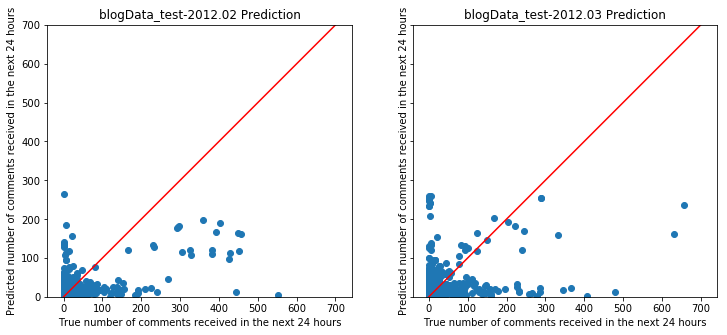

In [6]:
# Select columns from testing set 
df_02_testing_set_X = df_02[list(Xsignif.columns)]
df_03_testing_set_X = df_03[list(Xsignif.columns)]

df_02_testing_y = df_02.iloc[ :, -1:]
df_03_testing_y = df_03.iloc[ :, -1:]

# 'blogData_test-2012.02 Prediction'
fig, (ax1, ax2) = plt.subplots(1,2,sharey = 'row',figsize=(12,5))
y_oo2_predict = post_results.predict(df_02_testing_set_X)
ax1.scatter(df_02_testing_y, y_oo2_predict)
ax1.set_xlabel('True number of comments received in the next 24 hours')
ax1.set_ylabel('Predicted number of comments received in the next 24 hours')
ax1.plot([0,700],[0,700],'r-')
ax1.axis('equal')
ax1.set_ylim([0,700])
ax1.set_xlim([0,700])
ax1.set_title('blogData_test-2012.02 Prediction')


# 'blogData_test-2012.03 Prediction'
y_oo3_predict = post_results.predict(df_03_testing_set_X)
ax2.scatter(df_03_testing_y,y_oo3_predict)
ax2.set_xlabel('True number of comments received in the next 24 hours')
ax2.set_ylabel('Predicted number of comments received in the next 24 hours')
ax2.plot([0,700],[0,700],'r-')
ax2.axis('equal')
ax2.set_ylim([0,700])
ax2.set_xlim([0,700])
ax2.set_title('blogData_test-2012.03 Prediction')


# More numerical approach

test_02 = mean_squared_error(df_02_testing_y, y_oo2_predict)
test_03 = mean_squared_error(df_03_testing_y, y_oo3_predict) 

#--------------------------------------------------------------
print("MSE of Test blogData_test-2012.02 is: " + str(test_02))
print("MSE of Test blogData_test-2012.03 is: " + str(test_03))
#--------------------------------------------------------------

a) How did you address overfitting

Normally there are two ways to address overfitting: 

1) Rridge Regression + k-fold Cross-validation where we try to find the optimal lamda that minimizes MSE in the training set, and then use newly constructed Rridge Regression model with optimal lamda in the testing set to make statistical inference. This method is used when we believe all the features are important since none of varaibles / features are dropped when constructing a ridge regression. 

2) Variable Selection where we believe some of variables are more statistically important than others. When choosing variables, forward selection and backward elimination are two ways to decide if variables / features should be added / dropped while AIC, AICC, or BIC are used as a benchmark. 

Sadly, none of methods mentioned above were covered in class. The method that Professor used to address overfitting was simply to loop through all variables/features and only keep features that are statistically significant at a = 5% by examing if 0 is inside their 95% confidence interval. The rule of thumb is if 0 is inside its 95% confidence interval, then we fail to reject the null hypothesis and conclude that that variable / feature is not statistically significant, and thus that particular variable should be dropped. In this assignment, I did what professor did in the class to address overfitting, although statistically speaking such method is not valid as practitioner should never drop a bunch of variables all at once as a subset of variables may become statistically significant when others are dropped. Instead, a step to step dropping variable/adding variable approach is recommended as I have explained in 2). 


b) interpretation of the linear regression model results
In order to address overfitting, 235 columns are dropped in an attempt to solve multicollinearity problem. However, the result is not as desirable as we thought as multicollinearity is still present. R square also drops as we took out so many columns. However, a model with a bigger R-square doesn't mean it is a better model grounded on the fact that R-square only increases if more variables/features are added to the model ignoring the fact that more complex a model becomes, a higher chance of overfitting. The coeffcient of Beta1 is 0.3377, indicating a unit increase of feature 1 will result in increasing y(number of comments) by 0.3377. Since P>|t| is smaller than 0.05, it is also statistically significant. Similar interpretations prevail to other features' coeffcients and P values. 


c) compare the results for the two test datasets and mention any interesting observations

I have compared the results graphically above, a more numerical apporach could be using MSE(Mean Square Error)

MSE of Test blogData_test-2012.02 is: 756.050115665 

MSE of Test blogData_test-2012.03 is: 820.708588528

It seems that MSE of Test blogData_test-2012.02 is smaller than MSE of Test blogData_test-2012.03, indicating my regression model had a better performance in Test blogData_test-2012.02 than that of Test blogData_test-2012.03. 

### Task 2

Next, we will fit a logistic regression model that decides if a blog post is popular or not. In order to do so, note that you need to define a binary attribute on which you can fit the logistic regression model. As before, use the model to analyze the data.

1. Report the results of your linear regression model (error, factors, e.t.c.) for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) how did you define the binary attribute, b) interpretation of the logistic regression model results, c) compare the results for the two test datasets and mention any interesting observations ** (5 points) **

Total: ** (15 points) **

--------------------------------------------------------------------
I define it is popular if the number of comments is greater than 100
--------------------------------------------------------------------


/Users/CJ/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/CJ/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/CJ/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


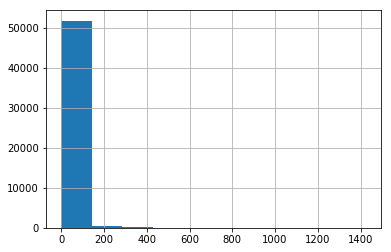

In [8]:
# Define popularity threshold
df_train['281'].describe()
df_train['281'].hist()

print("--------------------------------------------------------------------")
print("I define it is popular if the number of comments is greater than 100")
print("--------------------------------------------------------------------")

df_train["popularity"] = 0
for i in range(len(df_train["popularity"])):
    if df_train["281"][i] >= 100:
        df_train["popularity"][i] = 1

df_02["popularity"] = 0
for i in range(len(df_02["popularity"])):
    if df_02["281"][i] >= 100:
        df_02["popularity"][i] = 1

df_03["popularity"] = 0
for i in range(len(df_03["popularity"])):
    if df_03["281"][i] >= 100:
        df_03["popularity"][i] = 1


y_train = df_train["popularity"] 
X_train = Xsignif

y_test_02 = df_02["popularity"]
X_test_02 = df_02_testing_set_X

y_test_03 = df_03["popularity"]
X_test_03 = df_03_testing_set_X

In [14]:
def evaluate(y_train, X_train, y_test, X_test, threshold):
    # learn model on training data
    model = LogisticRegression()
    result = model.fit(X_train,y_train)
    # make probability predictions on test data
    y_pred = result.predict(X_test)
    # threshold probabilities to create classifications
    y_pred = y_pred > threshold
    # report metrics
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    return precision, recall

precision_02, recall_02 = evaluate(y_train, X_train, y_test_02, X_test_02, 0.5)
precision_03, recall_03 = evaluate(y_train, X_train, y_test_03, X_test_03, 0.5)

def F1_Score(pre,rec):
    return 2 * pre * rec / (pre + rec)

F1_Score_02 = F1_Score(precision_02,recall_02)
F1_Score_03 = F1_Score(precision_03,recall_03)

print('\nTesting result for blogData_test-2012.02 is Precision: {:0.3f}, Recall: {:0.3f}, F1 Score: {:0.3f}'.format(precision_02,recall_02,F1_Score_02))
print('\nTesting result for blogData_test-2013.03 is Precision: {:0.3f}, Recall: {:0.3f}, F1 Score: {:0.3f}'.format(precision_03,recall_03,F1_Score_03))


Testing result for blogData_test-2012.02 is Precision: 0.800, Recall: 0.333, F1 Score: 0.471

Testing result for blogData_test-2013.03 is Precision: 0.364, Recall: 0.163, F1 Score: 0.225


a) how did you define the binary attribute

I define the popularity meansure through observing histogram. Since most of y value are smaller than 100, I define it is popular if y(the number of comments) is greater than 100

b) interpretation of the logistic regression model results
Different from a liner regression whose y value is continuous, Logistic regression is concerned with estimating a probability. However, now y(the number of comments) is now a categorical variable, which we will code as 0/1. If y > 100, y = 1; else y = 0. The threshold I define in this problem is 0.5. Basically if p( y = 1 | x) >= 0.5, y = 1, prediced as popular, otherwise p( y = 1 | x) < 0.5, y = 0, prediced as not popular. 


c) compare the results for the two test datasets and mention any interesting observations



$$ Precision = \frac{True Positives}{True Positives + False Positives} $$




$$ Recall = \frac{True Positives}{True Positives + False Negatives} $$




$$ F1 Score = \frac{2 Precision · Recall}{Precision + Recall} $$


Testing result for blogData_test-2012.02 is Precision: 0.800, Recall: 0.333, F1 Score: 0.471

Testing result for blogData_test-2013.03 is Precision: 0.364, Recall: 0.163, F1 Score: 0.225

### Task 3

Now, we are going to use the K-Nearest Neighbors Classifier to decide if a blog post is popular or not. Please use the same popularity definition as in task 2, for this task. KNN is an instant-based classification which simply stores instances of the training data. Then, classification is computed from a majority vote of the nearest neighbors of each point.

1. Report the accuracy of your prediction for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) how did you define the nearest neighbors, b) interpretation of the KNN results, c) compare the results for the two test datasets and mention any interesting observations (5 points)

Total: ** (15 points) **

In [15]:
k = 5 
knn = KNeighborsClassifier(n_neighbors=k, p = 2, metric = 'minkowski')
knn.fit(X_train,y_train)
y_pred_test_02 = knn.predict(X_test_02)
y_pred_test_03 = knn.predict(X_test_03)
print('Accuracy on test data blogData_test-2012.02 is: {}'.format(knn.score(X_test_02, y_test_02)))
print('Accuracy on test data blogData_test-2012.03 is: {}'.format(knn.score(X_test_03, y_test_03)))

Accuracy on test data blogData_test-2012.02 is: 0.9877213021130783
Accuracy on test data blogData_test-2012.03 is: 0.9890776699029126


a) how did you define the nearest neighbors

To classify an unknown record: 

--->1)Compute distance to other training records 

--->2)Identify k nearest neighbors  

--->3) Use class labels of nearest neighbors to determine the class label of unknown record (e.g., by taking majority vote)

b) interpretation of the KNN results

In this problem, we strictly set up k = 5 so that there is no toss-up situation. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. Following the standard three-step approach above, we generate a knn model from the tranning set and use it to predict outcome of testing set with accuracy as performance metrics. 

c) compare the results for the two test datasets and mention any interesting observations 

$$Accuracy = \frac{True Positives + True Negatives}{True Positives + True Negatives + False Positives + False Negatives} $$

Accuracy on test data blogData_test-2012.02 is: 0.9877213021130783

Accuracy on test data blogData_test-2012.03 is: 0.9890776699029126

### Task 4

Finally, we are going to use the Decision Trees Classifier to decide if a blog post is popular or not. Please use the same popularity definition as in tasks 2,3, for this task. In order to construct a Decision Tree you will need to discretize some of the attributes.

1. Report the accuracy of your prediction for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) which attributes did you discretize and how, b) interpretation of the Decision Tree Classifier results, c) compare the results for the two test datasets and mention any interesting observations (5 points)

Total: ** (15 points) **

In [21]:
dtc = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, 
                                  class_weight=None, presort=False)
dtc.fit(X_train,y_train)
y_pred_test_tree_02 = dtc.predict(X_test_02)
y_pred_test_tree_03 = dtc.predict(X_test_03)
print('DT accuracy on test data blogData_test-2012.02 is: ', dtc.score(X_test_02, y_test_02))
print('DT accuracy on test data blogData_test-2012.03 is: ', dtc.score(X_test_03, y_test_03))

DT accuracy on test data blogData_test-2012.02 is:  0.985436893204
DT accuracy on test data blogData_test-2012.03 is:  0.984466019417


a) which attributes did you discretize and how

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split. If The max_features=None, max_features=n_features to consider when looking for the best split. A node will be split if this split induces a decrease of the impurity greater than or equal to 0.

b) interpretation of the Decision Tree Classifier results

Following the standard splitting procedures described above, we generate a decisiontree model from the tranning set and use it to predict outcome of testing set with accuracy as performance metrics. When we apply model to test data, we start from the root of the tree and just walk down the tree following spliting criteria until reaching a classfication.

c) compare the results for the two test datasets and mention any interesting observations

$$Accuracy = \frac{True Positives + True Negatives}{True Positives + True Negatives + False Positives + False Negatives} $$

DT accuracy on test data blogData_test-2012.02 is:  0.985436893204

DT accuracy on test data blogData_test-2012.03 is:  0.984466019417